## Time Series Analysis 2

### Imports

In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf # Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

### Setup the Data

In [8]:
# Get Amazon stock data and set the date as the index
df_1 = pd.read_csv('AMZN.csv', index_col='Date', parse_dates=True)
# Verify the index is a DatetimeIndex
df_1.index

DatetimeIndex(['2019-10-16', '2019-10-17', '2019-10-18', '2019-10-21',
               '2019-10-22', '2019-10-23', '2019-10-24', '2019-10-25',
               '2019-10-28', '2019-10-29',
               ...
               '2020-10-02', '2020-10-05', '2020-10-06', '2020-10-07',
               '2020-10-08', '2020-10-09', '2020-10-12', '2020-10-13',
               '2020-10-14', '2020-10-15'],
              dtype='datetime64[ns]', name='Date', length=253, freq=None)

### Visualizations

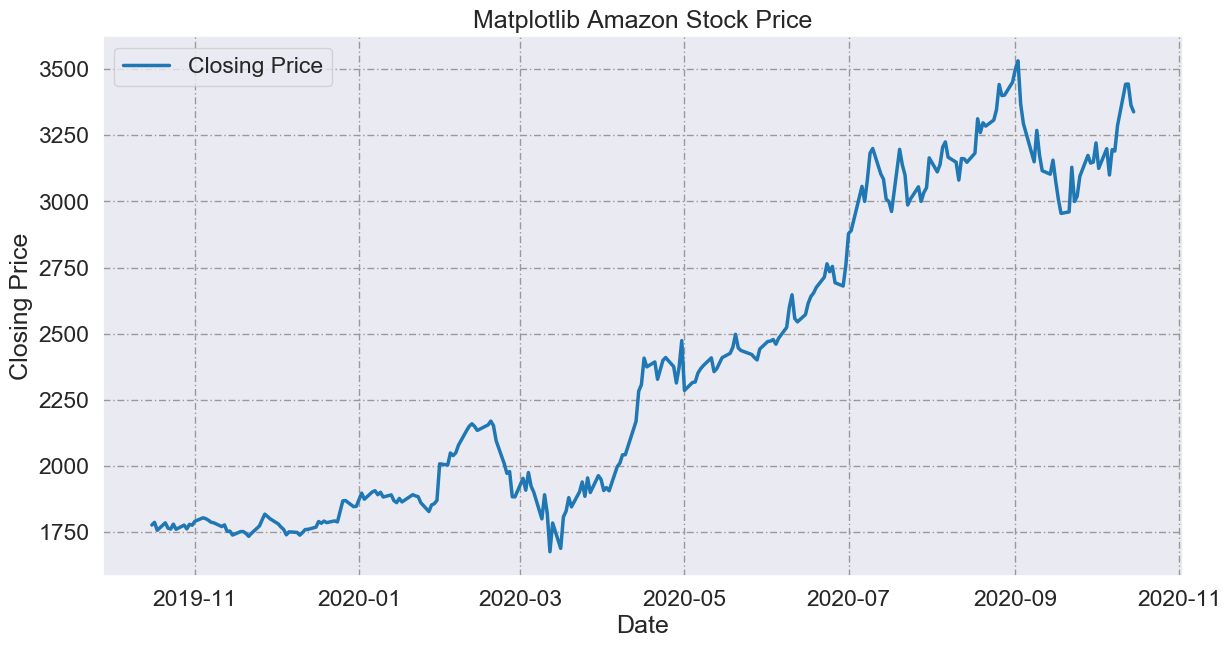

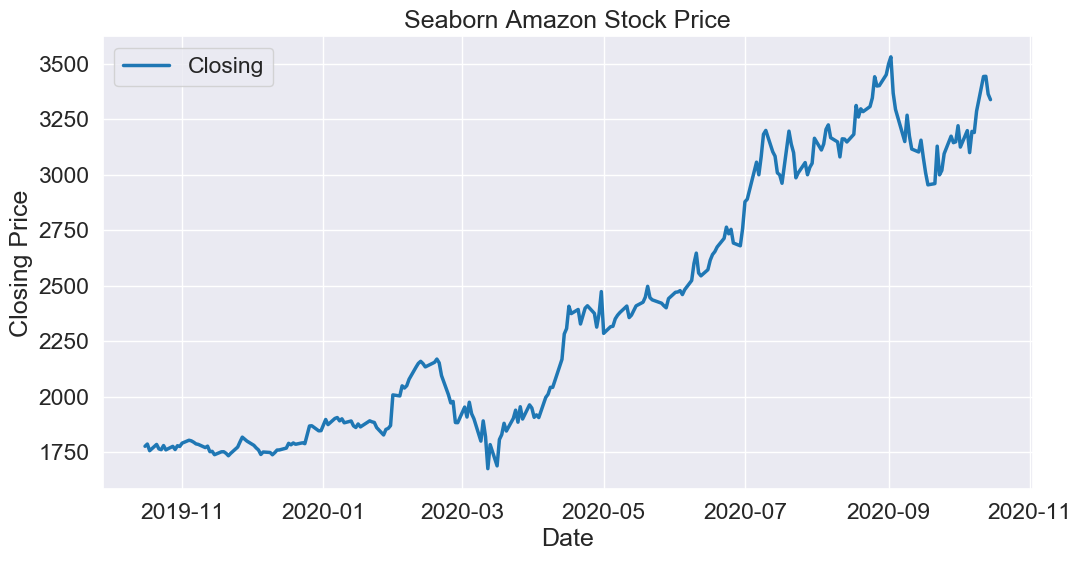

In [65]:
# Matplotlib 
fig_1 = plt.figure(figsize=(12,6), dpi=100)
axes_1 = fig_1.add_axes([0.0, 0.0, 0.9, 0.9])
axes_1.set_xlabel('Date')
axes_1.set_ylabel('Closing Price')
axes_1.set_title('Matplotlib Amazon Stock Price')
axes_1.plot(df_1.index, df_1['Close'], label='Closing Price')
axes_1.legend(loc=0)
axes_1.grid(True, color='0.6', dashes=(5,2,1,2))

# Seaborn
fig_3 = plt.figure(figsize=(12,6), dpi=100)
axes_2 = sns.lineplot(data=df_1, x=df_1.index, y="Close", label='Closing')
axes_2.set(xlabel='Date', ylabel='Closing Price')
axes_2.set_title('Seaborn Amazon Stock Price')
axes_2.legend(loc=0)
sns.set_style("darkgrid", {"axes_2.facecolor": ".9"})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})


### Plotly

In [67]:
# Plotly
fig_2 = go.Figure()
fig_2.add_trace(go.Scatter(x=df_1.index, y=df_1['Close'],
                    mode='lines',
                    name='Closing Price'))
fig_2.update_layout(
    xaxis=dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    yaxis=dict(
        showgrid=True, showline=True, showticklabels=True
    ),
    showlegend=True,
    xaxis_title='Date',
    yaxis_title='Closing Price',
    title='Plotly Amazon Stock Price'
)

### Matplotlib Finance

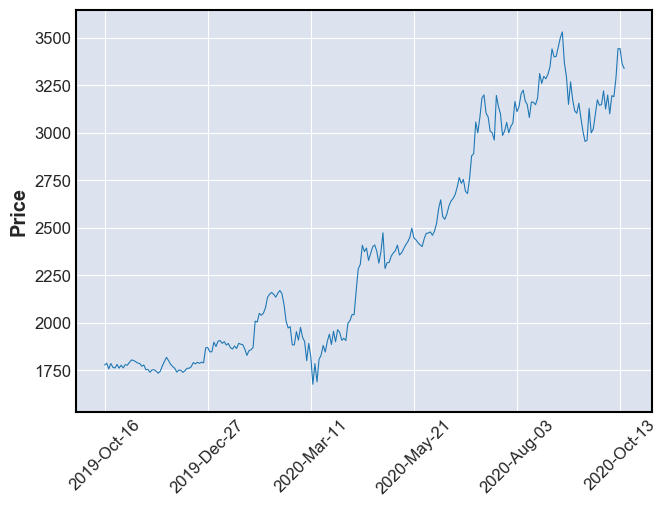

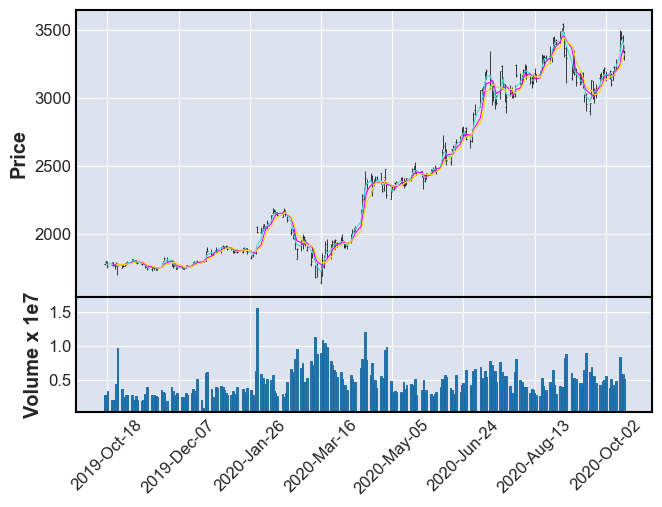

In [70]:
# Matplotlib Finances plots are very nice
mpf.plot(df_1, type='line')

# You can also plot multiple MAVS, volume and non-trading day data
# MAV last previous 3, 5 and 7 observations
mpf.plot(df_1, type='ohlc', mav=(3, 5, 7), volume=True, show_nontrading=True)

### Plotting Time Periods & Styling

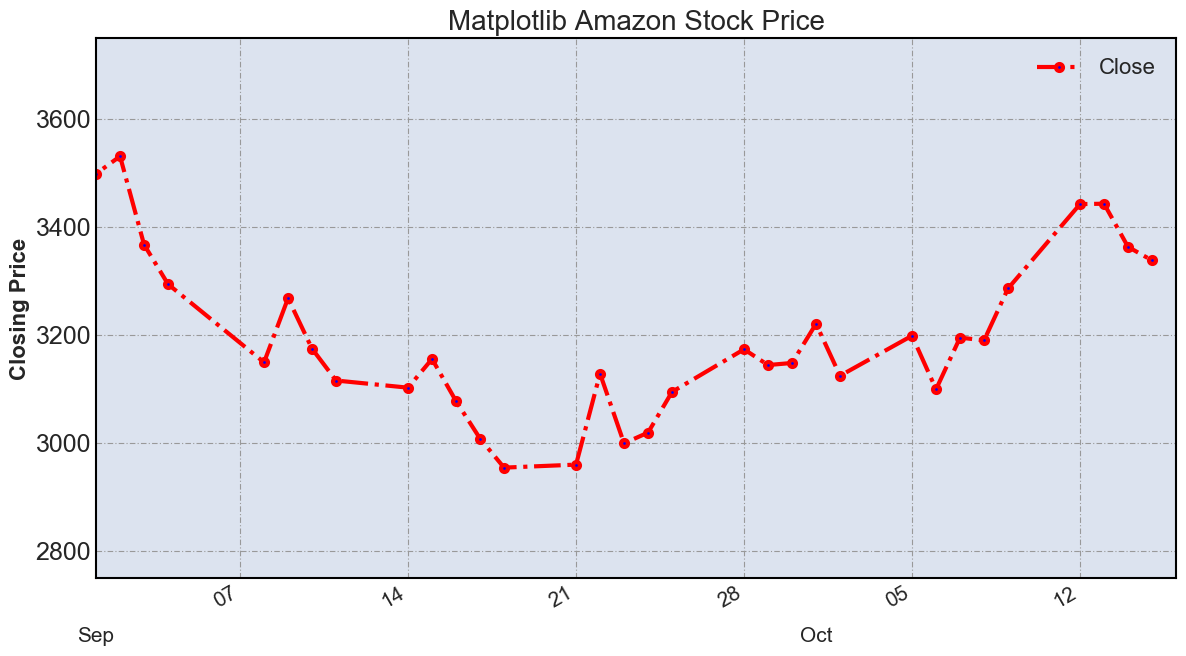

In [151]:
fig_4 = plt.figure(figsize=(12,7), dpi=100)
ax_1 = fig_4.add_axes([0.0, 0.0, 0.9, 0.9])
ax_1.set_xlabel('Date')
ax_1.set_ylabel('Closing Price')
ax_1.set_title('Matplotlib Amazon Stock Price', fontsize=20)

# Matplotlib allows you to define time periods to plot
# You can style the line color, width, line style, and marker styling
df_1['Close'].plot(figsize=(12,6), 
                   xlim=['2020-09-01','2020-10-16'], 
                   ylim=[2750,3750],
                  color='red',
                  lw=3,
                  ls='-.',
                  marker='o', markersize=5, 
                   markerfacecolor='blue', 
                   markeredgecolor='red', markeredgewidth=3)
ax_1.legend(loc=0)
ax_1.grid(True, color='0.6', dashes=(5,2,1,2))

# Set tick font sizes
ax_1.tick_params(axis="x", labelsize=15)
ax_1.tick_params(axis="y", labelsize=18)

# Set axis label font sizes and turn off Date label
plt.xlabel('', fontsize=18)
plt.ylabel('Closing Price', fontsize=16)

# Set legend font size
plt.legend(loc=0, prop={'size': 16})

# Set the x axis to put ticks by week days
ax_1.xaxis.set_major_locator(dates.WeekdayLocator(byweekday=0))

# Set so that only month and day shows
# https://matplotlib.org/api/dates_api.html
# %Y - 4 digit year
# %y - 2 digit year
# %m - month as a number 
# %b - month as abbreviated name
# %d - day
# %a - abbreviated day
# ax_1.xaxis.set_major_formatter(dates.DateFormatter('%m/%d'))

# We can also use major and minor locators
ax_1.xaxis.set_major_formatter(dates.DateFormatter('%d'))
ax_1.xaxis.set_minor_locator(dates.MonthLocator())
ax_1.xaxis.set_minor_formatter(dates.DateFormatter('\n\n%b'))

# Change minor label font size
ax_1.tick_params(axis='both', which='minor', labelsize=15)

### Stuff